In [9]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(8,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [12]:
history=model.fit(train_data,train_target,epochs=30)

Epoch 1/30
225/225 [==============================] - 5s 19ms/step - loss: 1.9556 - accuracy: 0.2260
Epoch 2/30
225/225 [==============================] - 4s 19ms/step - loss: 1.4607 - accuracy: 0.4576
Epoch 3/30
225/225 [==============================] - 4s 19ms/step - loss: 1.1320 - accuracy: 0.5906
Epoch 4/30
225/225 [==============================] - 4s 19ms/step - loss: 0.9430 - accuracy: 0.6747
Epoch 5/30
225/225 [==============================] - 4s 19ms/step - loss: 0.7942 - accuracy: 0.7219
Epoch 6/30
225/225 [==============================] - 4s 19ms/step - loss: 0.6702 - accuracy: 0.7632
Epoch 7/30
225/225 [==============================] - 4s 19ms/step - loss: 0.5475 - accuracy: 0.8099
Epoch 8/30
225/225 [==============================] - 4s 19ms/step - loss: 0.4409 - accuracy: 0.8490
Epoch 9/30
225/225 [==============================] - 4s 19ms/step - loss: 0.3656 - accuracy: 0.8756
Epoch 10/30
225/225 [==============================] - 4s 19ms/step - loss: 0.2885 - accura

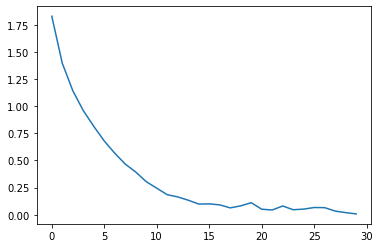

In [13]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

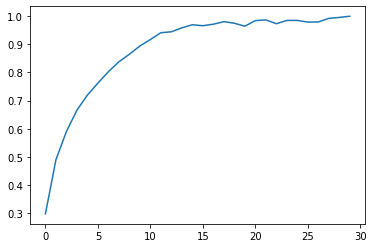

In [14]:
plt.plot(history.history['accuracy'])
#if not working replace 'accuracy' with 'acc'

In [15]:
print(model.evaluate(test_data,test_target))

25/25 [==============================] - 0s 8ms/step - loss: 2.6937 - accuracy: 0.7163
[2.6937367916107178, 0.7162500023841858]


In [16]:
model.save_weights('modelAgeGender.h5')

In [17]:
import os
import cv2
import numpy as np

test_path='test1'

img_names=os.listdir(test_path)
category_dict={0:'13-26_Female', 1:'13-26_Male', 2:'27-40_Female', 3:'27-40_Male', 4:'4-12_Female', 5:'4-12_Male', 6:'40+_Female', 7:'40+_Male'}

for img_name in img_names:
    img=cv2.imread(os.path.join(test_path,img_name))
    h,w=img.shape[0:2]

    #preprocessing (As done for the training images)
    test_img=cv2.resize(img,(50,50))
    test_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
    test_img=test_img/255
    test_img=test_img.reshape(1,50,50,1)
    
    results=model.predict(test_img)
    label=np.argmax(results,axis=1)[0]
    acc=int(np.max(results,axis=1)[0]*100)
    
    print(results,label,category_dict[label],acc)
    
    img[0:50,0:w]=[0,255,0]
    cv2.putText(img,category_dict[label],(20,40),cv2.FONT_HERSHEY_SIMPLEX,1.5,(255,255,255),2)
    cv2.putText(img,str(acc)+'%',(400,40),cv2.FONT_HERSHEY_SIMPLEX,1.5,(255,255,255),2)
    
    cv2.imshow('LIVE',img)
    k=cv2.waitKey(10000)
    if(k==27):
        break
cv2.destroyAllWindows()

[[1.7004103e-08 1.3495672e-17 1.5138780e-03 8.5315950e-13 1.7675878e-11
  1.9981945e-09 9.9848610e-01 1.7799310e-17]] 6 40+_Female 99
[[1.5185378e-17 1.3612176e-19 1.6527310e-27 1.1061973e-27 9.9986029e-01
  1.3969121e-04 1.8307808e-28 1.9643215e-35]] 4 4-12_Female 99
[[2.5092238e-03 2.4258553e-19 9.9749076e-01 3.6196348e-18 1.1573349e-22
  6.5203467e-18 5.6278399e-11 8.1420728e-09]] 2 27-40_Female 99
[[3.2150787e-17 7.8521325e-16 7.1946783e-07 9.9508578e-01 8.7679420e-24
  2.1317062e-10 5.9984905e-06 4.9074823e-03]] 3 27-40_Male 99
[[2.1135920e-17 2.5654477e-18 1.1620523e-01 5.8042914e-01 1.4467416e-19
  8.0451440e-07 3.9613854e-16 3.0336490e-01]] 3 27-40_Male 58
[[1.0362319e-05 5.2324759e-12 1.8730464e-07 9.9983454e-01 3.2792425e-16
  1.5484469e-04 3.4702945e-13 1.3991106e-08]] 3 27-40_Male 99
[[8.7678897e-10 9.9991286e-01 1.5105078e-07 4.9231672e-09 9.4450501e-09
  3.0216972e-05 1.0113159e-07 5.6694178e-05]] 1 13-26_Male 99
[[9.9992812e-01 6.7837032e-18 5.1421051e-07 1.7623210e-08 2